<div style="text-align: center;"> 
  <div style="padding:20px; 
              color:#1DA1F2; 
              font-size:220%; 
              border-radius:20px; 
              border-width: 5px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 2px 2px 10px rgba(29,161,242,0.8); 
              box-shadow: 0 0 15px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: 1000px; 
              margin: auto;">
  Problem Statement
  </div>
</div>

In today's digital age, social media platforms are very much popular amongst all age categories. Approximately, 63.9% of the words population (5.24 billion) uses social media platforms with an average user spending roughly 2 hours 21 minutes on it daily. Today, social media platforms have become the primary channel for communication and interactions. However, since 2013 there has been a steady rise on the overall negativity present on the platforms. The main driving force for this rise is due to the hate speech and offensive language remarks present all over social media. These forms of expression can perpetuate discrimination, foster hostility, and negatively impact ones mental well-being.

Hate speech is generally defined as any communication that attacks or denigrates a person or group based on attributes like race, religion, ethnicity, gender, sexual orientation, or disability. Offensive language, less severe, is defined by words or phrases that can be used in a disrespectful, insulting, or hurtful manner without targeting a particular group. Both are considered as a negative form of message to the opposite party.

The presence of such language leads to several significant issues:

User Safety: Hate speech and offensive language create unsafe online spaces, discouraging healthy discussions and making users feel alienated.
Platform Reputation: Platforms that fail to address these concerns risk losing user trust and facing scrutiny from regulators.
Legal and Ethical Implications: Many countries enforce strict laws against hate speech, requiring platforms to take proactive measures to filter such content.
Scalability of Moderation: Given the vast amount of content generated daily, manual moderation is neither practical nor scalable.

Our goal is to build a model which can identify such negative remarks and comments and prevent it from reaching the victim before its too late. This way we can make social media a safe environment for everyone to use and foster healthy relationships between the users.

<div style="display: flex; gap: 20px; align-items: center;">
  <img src="image.webp" alt="Image Description" width="550" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  <img src="image2.jpg" alt="Image Description" width="600" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
</div>

<div style="text-align: center;">
  <div style="padding:20px; 
              color:#1DA1F2; 
              font-size:220%; 
              border-radius:20px; 
              border-width: 5px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 2px 2px 10px rgba(29,161,242,0.8); 
              box-shadow: 0 0 15px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: 1000px; 
              margin: auto;">
  Background information on the dataset
  </div>
</div>

The dataset we are using, named hate_speech_offensive, is a meticulously curated collection of annotated tweets with the specific purpose of detecting hate speech and offensive language. The dataset primarily consists of English tweets and is designed to train machine learning models or algorithms in the task of hate speech detection. It should be noted that the dataset has not been divided into multiple subsets, and only the train split is currently available for use.

The dataset includes several columns that provide valuable information for understanding each tweet's classification. The column count represents the total number of annotations provided for each tweet, whereas hate_speech_count signifies how many annotations classified a particular tweet as hate speech. On the other hand, offensive_language_count indicates the number of annotations categorizing a tweet as containing offensive language. Additionally, neither_count denotes how many annotations identified a tweet as neither hate speech nor offensive language.

For researchers and developers aiming to create effective models or algorithms capable of detecting hate speech and offensive language on Twitter, this comprehensive dataset offers a rich resource for training and evaluation purposes

It consists of annotated tweets with information about their classification as hate speech, offensive language, or neither. Each row represents a tweet along with the corresponding annotations provided by multiple annotators. The main columns that will be essential for your analysis are: count (total number of annotations), hate_speech_count (number of annotations classifying a tweet as hate speech), offensive_language_count (number of annotations classifying a tweet as offensive language), neither_count (number of annotations classifying a tweet as neither hate speech nor offensive language).

The data collection methodology used to create this dataset involved obtaining tweets from Twitter's public API using specific search terms related to hate speech and offensive language. These tweets were then manually labeled by multiple annotators who reviewed them for classification purposes.

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">
  Importing necessary modules
  </div>

In [237]:
# Machine Learning Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight

# Natural Language Processing (NLP) Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from lime.lime_text import LimeTextExplainer
from collections import OrderedDict

# Data Manipulation and Processing
import pandas as pd
import numpy as np

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">
  Exploratory Data Analysis
  </div>

In [238]:
df=pd.read_csv("train.csv")

In [239]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [241]:
df.shape

(24783, 6)

In [242]:
df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'class', 'tweet'],
      dtype='object')

In [243]:
df.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [244]:
df['class'].unique()

array([2, 1, 0])

In [245]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Right now the target variable has 3 classes (Hate speech, Offensive Language, Neither). The dataset is dominated by offensive lanugage tweets.

EDA Graphs Ideas

- Count plot (DONE)
- Pie Chart (DONE)
- Word Cloud
- Tree Maps (Top few words in negative (hate speech & offensive language))
- Tweet Length by Class (Character & Words)
- Most Common words in our Tweet


In [246]:
class_labels = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
class_counts = df['class'].value_counts()

In [247]:
df['labels'] = df['class'].map(class_labels)

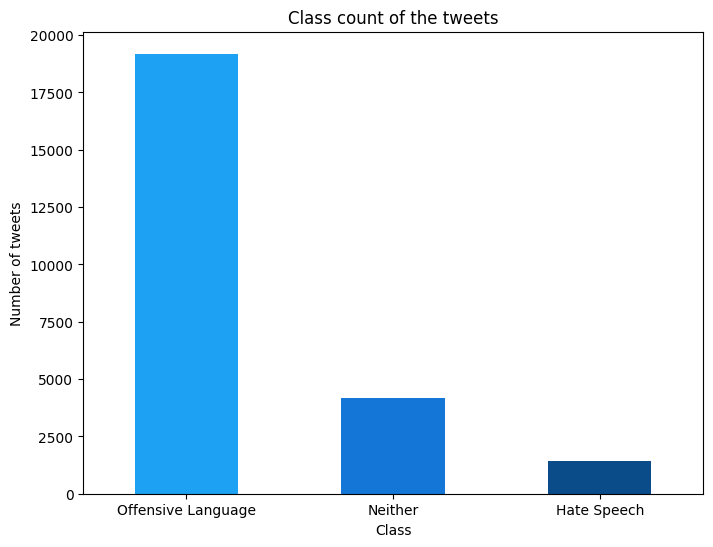

In [248]:
palette = ['#1DA1F2', '#1476D6', '#0A4C8A']

plt.figure(figsize=(8, 6))
class_counts.rename(index=class_labels).plot(kind='bar', color=palette)
plt.title('Class count of the tweets')
plt.xlabel('Class')
plt.ylabel('Number of tweets')
plt.xticks(rotation=0)
plt.show()

From this countplot it is evident that majority of the tweets are classified as offensive language. Hate speech and neither class on the other hand has a narrower gap between them. This class imbalance is a critical factor to be considered during data cleaning & preprocessing to ensure that the model does not become biased towards the dominant class which could affect the overall performance and fairless of the classification models.

In [249]:
import plotly.express as px
fig = px.pie(df, values=class_counts.values, names=class_labels, color=class_labels,
             color_discrete_map={'Hate Speech':'cyan',
                                 'Offensive Language':'royalblue',
                                 'Neither':'darkblue'})

fig.update_traces(textinfo='percent+label', texttemplate='%{label}<br>%{percent:.1%}', 
                  hovertemplate='%{label}: %{value}', 
                  marker=dict(line=dict(color='white', width=2)))

fig.update_layout(
    title = "Percentage distribution of the tweets by class"
)

fig.show()

From the pie chart we are able to see the percentage breakdown of the different tweet classes.
| class       | percentage |
|--------|-------|
| Hate Speech  | 77.4%    |
| Offensive Language  | 16.8%     |
| Neither  | 5.8%     |

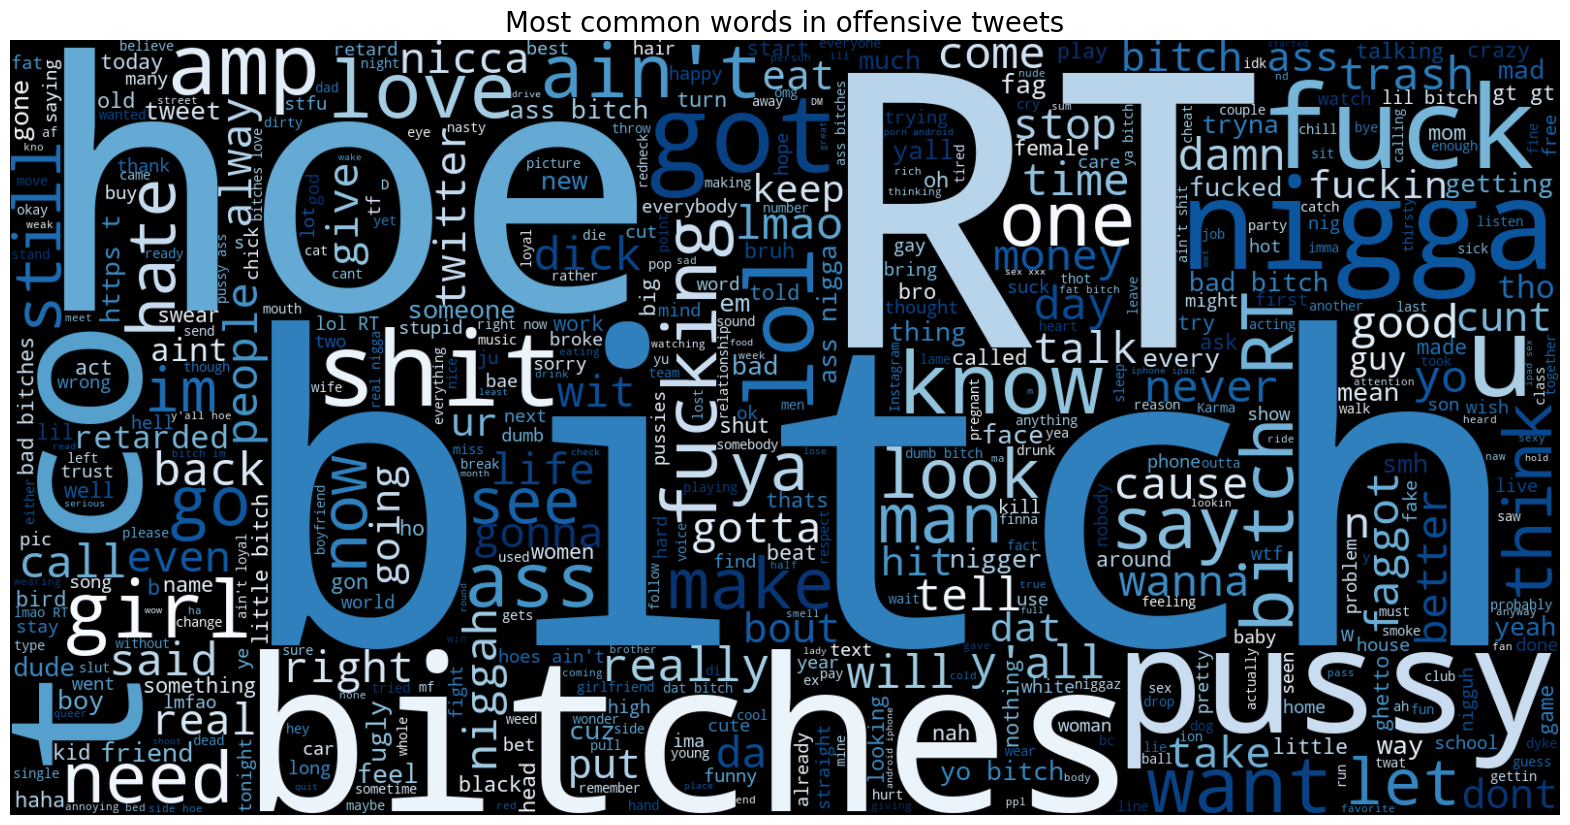

In [256]:
offensive_tweets = df[df['labels'] == 'Offensive Language']['tweet']

text = ' '.join(offensive_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in offensive tweets', fontsize=20)
plt.show()

Through the word cloud we are able to see the common words present in the offensive tweets. 
Words such as 'bitch', 'RT', 'hoe', 'bitches', 'fuck' are most commonly present words.

However, the term 'RT' refers to retweet and it is not meaningful word in the sentence. By removing the term 'RT' from the sentences the meaning of the setence would not change and the NLP model will be able to focus on the actual words determing the classification. Will handle this during the data cleansing portion further down the notebook.

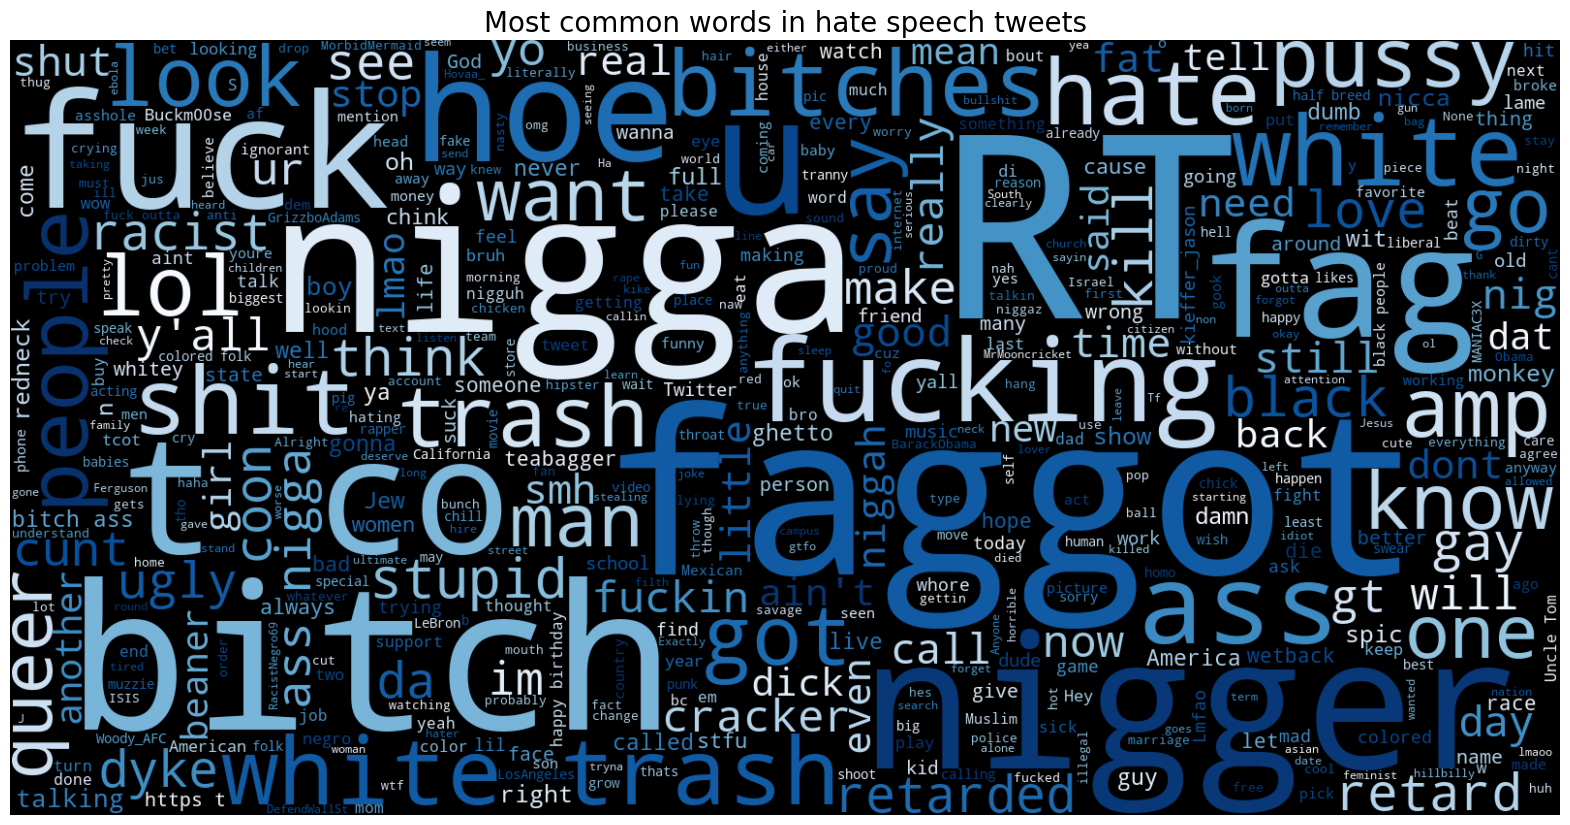

In [259]:
hate_tweets = df[df['labels'] == 'Hate Speech']['tweet']

text = ' '.join(hate_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in hate speech tweets', fontsize=20)
plt.show()

Through the word cloud we are able to see the common words present in the hate speech tweets. 
Words such as 'faggot, 'nigga', 'RT', 'hoe', 'bitch', 'fuck' are most commonly present words.

Similar effect of term 'RT' to the modelling in the future (As explained above).

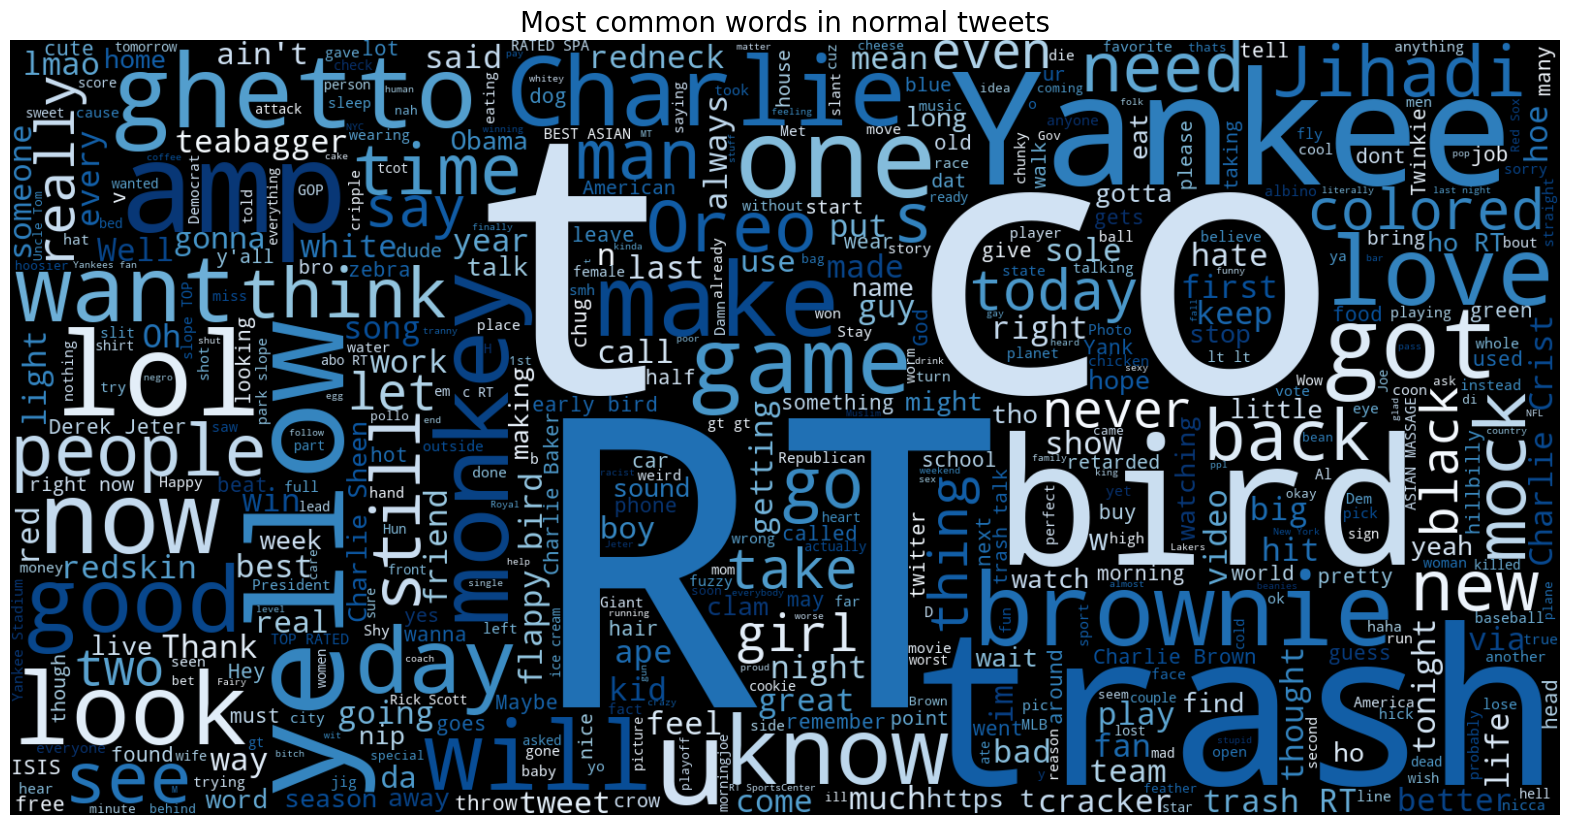

In [262]:
normal_tweets = df[df['labels'] == 'Neither']['tweet']

text = ' '.join(normal_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in normal tweets', fontsize=20)
plt.show()

Through the word cloud we are able to see the common words present in the normal tweets. 
Words such as 'lol', 'RT', 'CO', 'bird', 'trash', 'yell', 't' are most commonly present words.

Similar effect of term 'RT' to the modelling in the future (As explained above).
Term's such as 't', 'co' also comes under this case.

### Count Vectorizer vs Tfidf Vectorizer

CountVectorizer does the job of creating a word count table. It takes in the collection of text data and converts it into a matrix of token counts. Each row represents the text/sentence and each column represents a unique word (or token). The values indicates how many times each word appears within the sentence/text.

Suppose you have three sentences:

"I love coding."
"Coding is fun."
"I love learning new things."
Using CountVectorizer, the result might look something like this:

|        | coding | fun | i | is | learning | love | new | things |
|--------|-------|-----|---|----|----------|------|-----|-------|
| Doc 1  | 1     | 0   | 1 | 0  | 0        | 1    | 0   | 0     |
| Doc 2  | 1     | 1   | 0 | 1  | 0        | 0    | 0   | 0     |
| Doc 3  | 0     | 0   | 1 | 0  | 1        | 1    | 1   | 1     |

TfidfVectorizer is an extension of CountVectorizer. While CountVectorizer counts the words, TfidfVectorizer goes a step further and addtionally considers the importance of words across all the sentences. It assigns more weight to words that appear more frequently in a single input but are rare across other inputs, making it to better distinguish between words like "a" and actual meaningful terms.

|        | coding | fun | i | is | learning | love | new | things |
|--------|-------|-----|---|----|----------|------|-----|-------|
| Doc 1  | 0.70710678     | 0   | 0.70710678 | 0  | 0        | 0.70710678   | 0   | 0     |
| Doc 2  | 0.4736296     | 0.4736296   | 0 | 0.40204024  | 0       | 0    | 0   | 0     |
| Doc 3  | 0     | 0   | 0.52863461 | 0  | 0.40204024        | 0.40204024    | 0.52863461   | 0.52863461     |